In [5]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_theme()
sns.set_style('whitegrid')
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
mpl.rcParams['lines.markeredgecolor'] = 'w'
mpl.rcParams['lines.markeredgewidth'] = .5
mpl.rcParams['figure.figsize'] = [12, 7]
mpl.rcParams['axes.titlesize'] = 18
import pandas as pd
import numpy as np
from numpy import exp, sin, cos, sqrt, log10, pi
from scipy.integrate import odeint

# Homework 9
# ODEs
## Ethan Gallup
## Unid: u1033198

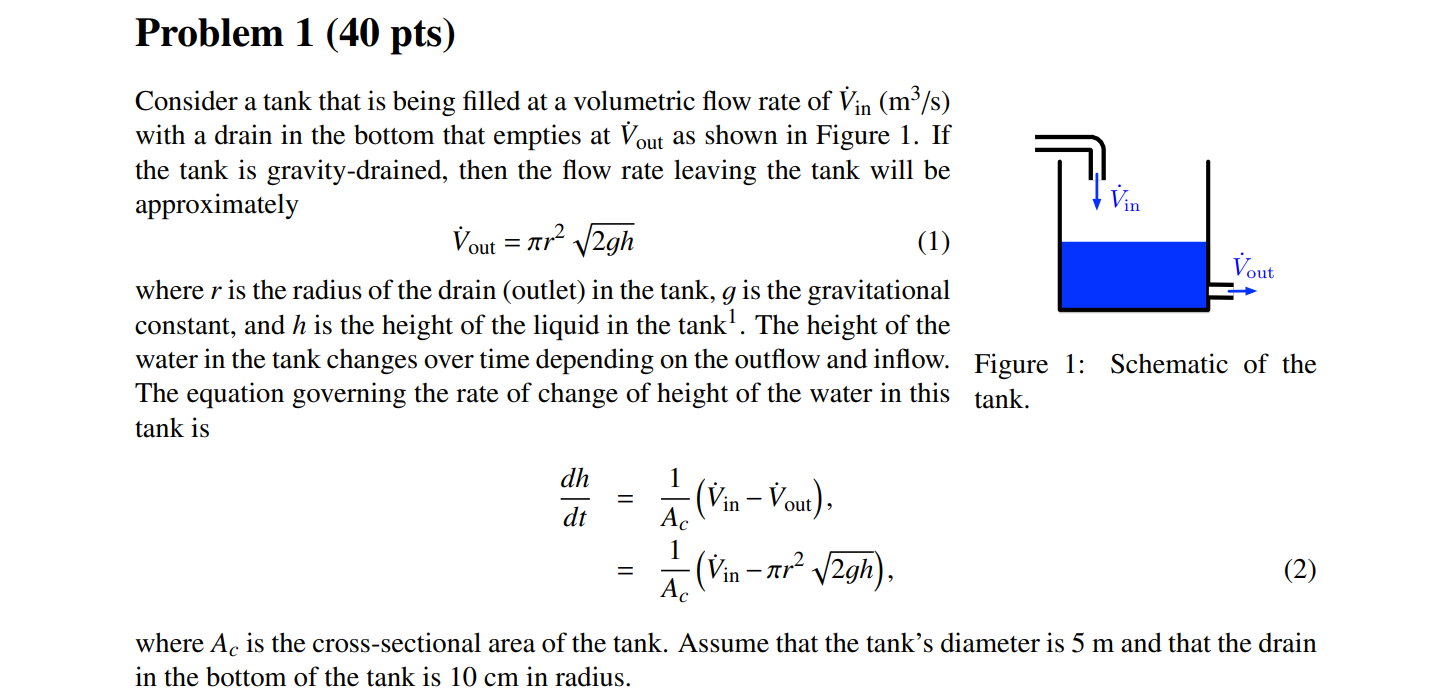

In [6]:
def dh(h, t, Ac, Vin, r):
    dh_dt = (1/Ac)*(Vin - pi*(r**2)*sqrt(2*9.8*h))
    return dh_dt

1. (10 pts) What is the steady-state liquid height in the tank for a constant $\dot{V}_{in}$? Express your answer in terms of quantities in (2). (HINT: @ steady state, $\frac{dh}{dt}=0$)

$$
\frac{dh}{dt} = \frac{1}{A_c}\left(\dot{V}_{in}-\dot{V}_{out}\right)\\
\frac{dh}{dt} = \frac{1}{A_c}\left(\dot{V}_{in}-\pi r^2\sqrt{2gh}\right)\\
0 = \frac{1}{A_c}\left(\dot{V}_{in}-\pi r^2\sqrt{2gh}\right)\\
\frac{\dot{V}_{in}}{\pi r^2}=\sqrt{2gh}
$$


$$
\large{2g\left(\frac{\dot{V}_{in}}{\pi r^2}\right)=h}
$$

2. (30 pts) For a steady-state liquid height of $1.0 m$ (note that this implies a particular value for $\dot{V}_{in}$ which you can find from your results in part 1) and initial liquid heights of $h_0 = \{0,0.4,0.8,1.2,1.6\}$, plot h(t) for $t = [0,60]$ minutes for all of these $h_0$ values. Plot all of them on the same figure and include an appropriate legend along with axes labels. Also provide a table that shows the value h at $t = 60$ minutes you find for each value of $h_0$.


$$
\dot{V}_{in}=\pi r^2 \sqrt{2gh}\\
\dot{V}_{in}=\pi r^2 \sqrt{2g(1)}
$$

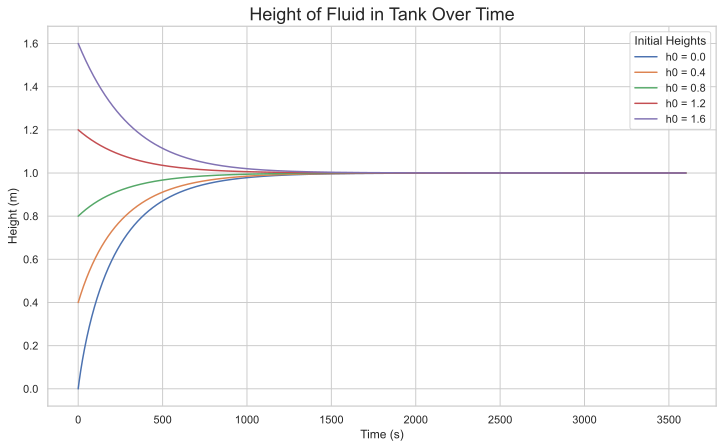

,h60
h0,
0.0,0.999998
0.4,0.999999
0.8,0.999999
1.2,1.000001
1.6,1.000002


In [7]:
r = .1  # m
g = 9.8  # m/s
h_eq = 1  # m
A_c = pi*(5/2)**2
V_in = pi*r**2*sqrt(2*g*h_eq)

table = pd.DataFrame(columns=['h0', 'h60'])

time = 60 * 60 # seconds
t = np.arange(0, time+0.01, .001)

h0s = np.arange(0, 1.7, 0.4)

for h0 in h0s:
    h = odeint(dh, h0, t, args=(A_c, V_in, r))
    table = table.append({'h0': h0, 'h60': h[-1,0]}, ignore_index=True)
    plt.plot(t, h, label=f'h0 = {h0:.1f}')

plt.xlabel('Time (s)')
plt.ylabel('Height (m)')
plt.title('Height of Fluid in Tank Over Time')
plt.legend(title='Initial Heights')
plt.show()

table.index = table.h0
table = table.drop(['h0'], axis=1)
table

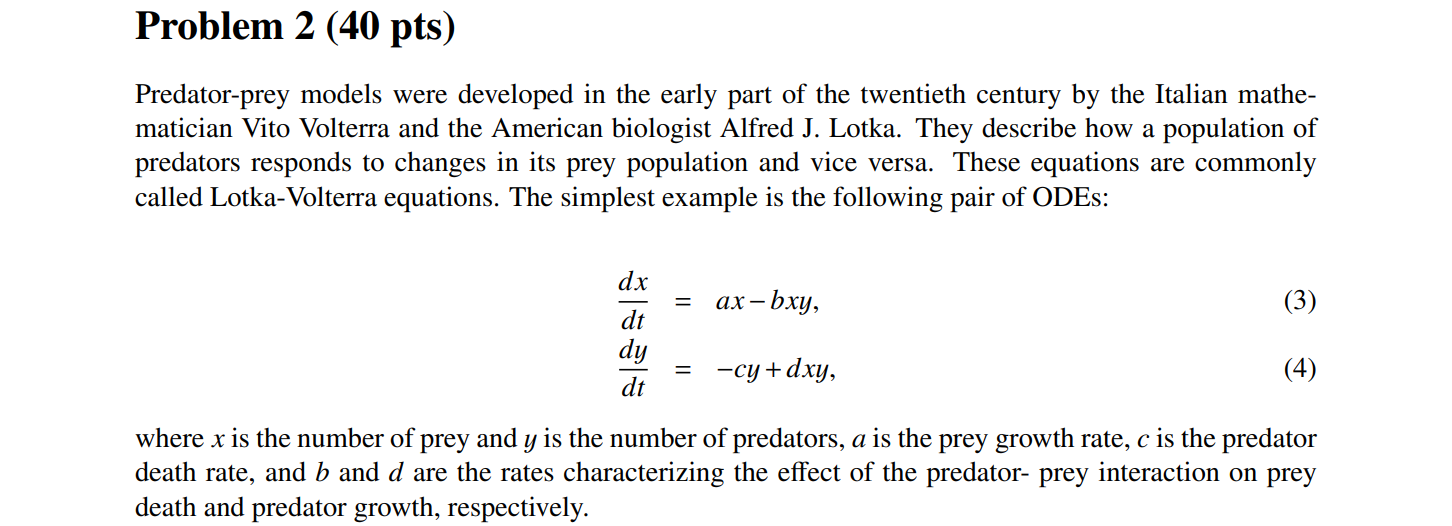

In [8]:
def rates(pops, t, a, b, c, d):
    x, y = pops
    dx_dt = a*x - b*x*y
    dy_dt = -c*y + d*x*y
    return [dx_dt, dy_dt]

1. (40 pts) Assuming the above model works for the rabbits (prey) and foxes (predator), starting with a population of five rabbits and two foxes, integrate the above system of equations using odeint. Use $a = 1.2$, $b = 1.0$, $c = 1.0$, and $d = 0.5$. Use an appropriate timestep size and integrate the system until $t = 10$. Note that time is dimensionless in these equations. Plot the prey and predator populations on the same plot and discuss your results. Note that you can use odeint for this problem.


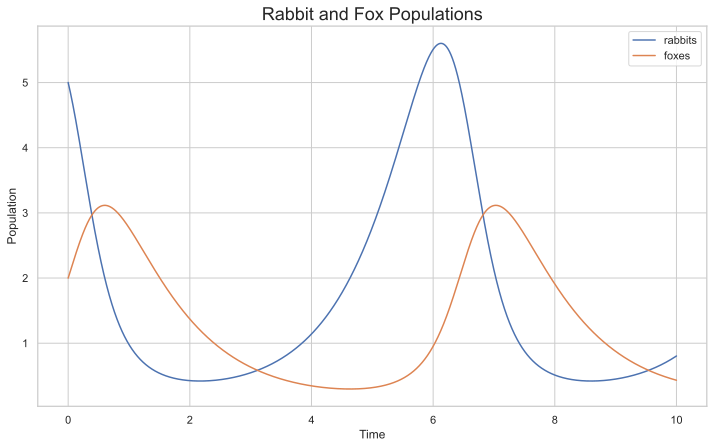

In [23]:
t = np.arange(0, 10, .001)
rabbits = 5
foxes = 2
coefs = (1.2, 1.0, 1.0, 0.5)
test = 0
populations = odeint(rates, [rabbits, foxes], t, args=coefs)
plt.plot(t, populations)
plt.legend(['rabbits', 'foxes'])
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Rabbit and Fox Populations')
plt.show()

The fox population increases in response to the rabbit population and this makes the rabbit population go down which in turn brings down the fox population.